# Assignment: Pandas Groupby with Hurricane Data

Import Numpy, Pandas and Matplotlib and set the display options.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


Use the following code to load a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset:

In [2]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

How many rows does this dataset have?

In [3]:
df.count()

SID         716354
SEASON      716354
NUMBER      716354
BASIN       716354
SUBBASIN    716354
NAME        390520
ISO_TIME    716354
NATURE      716354
LAT         716354
LON         716354
WMO_WIND    157570
WMO_PRES    160275
dtype: int64

The row number of this dataset is 716354

How many North Atlantic hurricanes are in this dataset?

In [4]:
na_hurricanes_count = df[df['BASIN'] == 'NA'].shape[0]
print(f'The number of the North Atlantic hurricanes are: {na_hurricanes_count}')

# 需要总结不同的SID吗？

The number of the North Atlantic hurricanes are: 126593


### 1) Get the unique values of the `BASIN`, `SUBBASIN`, and `NATURE` columns

In [5]:
unique_basin = df['BASIN'].unique()
unique_basin


array(['NI', 'SI', 'NA', 'EP', 'WP', 'SP', 'SA'], dtype=object)

In [6]:
unique_subbasin = df['SUBBASIN'].unique()
unique_subbasin


array(['BB', 'AS', 'MM', 'GM', 'NA', 'CS', 'WA', 'EA', 'CP'], dtype=object)

In [7]:
unique_nature = df['NATURE'].unique()
unique_nature


array(['NR', 'TS', 'ET', 'SS', 'MX', 'DS'], dtype=object)

### 2) Rename the `WMO_WIND` and `WMO_PRES` columns to `WIND` and `PRES`

In [8]:
df = df.rename(columns={'WMO_WIND': 'WIND', 'WMO_PRES': 'PRES'})
df.head()


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


### 3) Get the 10 largest rows in the dataset by `WIND`

In [9]:
top10_wind = df.nlargest(10, 'WIND', keep='all')
top10_wind
# It is worth noting that there are some parallels

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
666142,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
666140,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
666144,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
427655,1980214N11330,1980,57,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
178210,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0
178211,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
178213,1935241N23291,1935,46,NA,GM,NaN,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,NaN
482093,1988253N12306,1988,74,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
552477,1997253N12255,1997,81,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0
605764,2005289N18282,2005,97,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,160.0,882.0


You will notice some names are repeated.

### 4) Group the data on `SID` and get the 10 largest hurricanes by `WIND`

In [10]:
largest_wind_by_sid = df.groupby('SID').aggregate({'WIND': 'max'})
# df.groupby(df.index.month).aggregate({'T_DAILY_MEAN': 'mean', 'T_DAILY_MAX': 'max', 'T_DAILY_MIN': 'min'})
top10_wind_by_sid = largest_wind_by_sid.nlargest(10, 'WIND', keep='all')
top10_wind_by_sid
# It is worth noting that there are some parallels

,WIND
SID,
2015293N13266,185.0
1980214N11330,165.0
1935241N23291,160.0
1988253N12306,160.0
1997253N12255,160.0
2005289N18282,160.0
2019236N10314,160.0
1998295N12284,155.0
2005261N21290,155.0


### 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

Use the name on the x-axis.

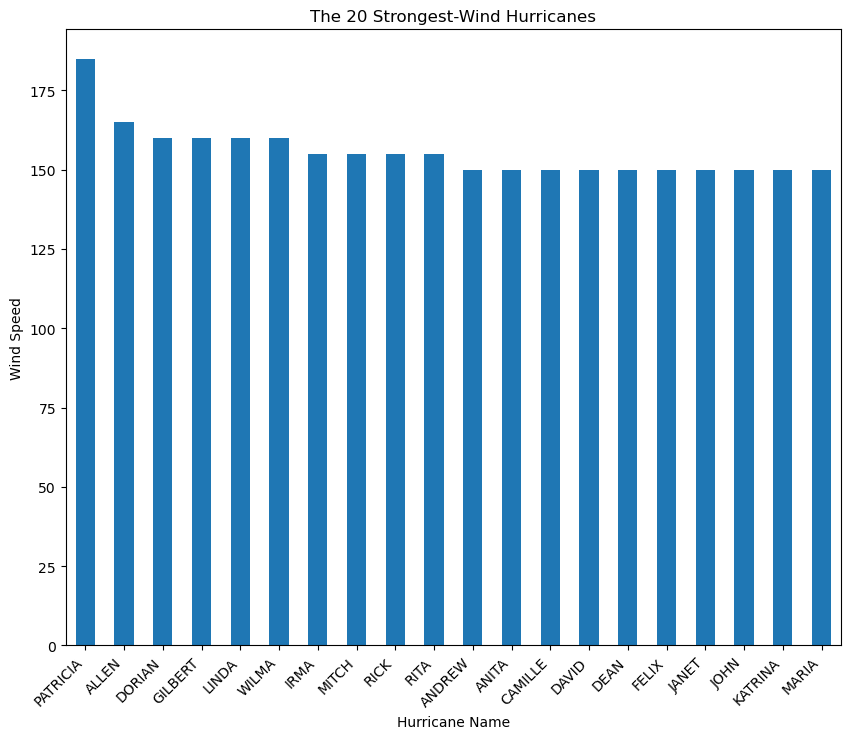

In [11]:
df.groupby('NAME').aggregate({'WIND': 'max'}).nlargest(20, 'WIND').plot(kind='bar', figsize=(10, 8), legend=False)
plt.xlabel('Hurricane Name')
plt.ylabel('Wind Speed')
plt.title('The 20 Strongest-Wind Hurricanes')
plt.xticks(rotation=45, ha='right')
plt.show()

### 6) Plot the count of all datapoints by Basin

as a bar chart

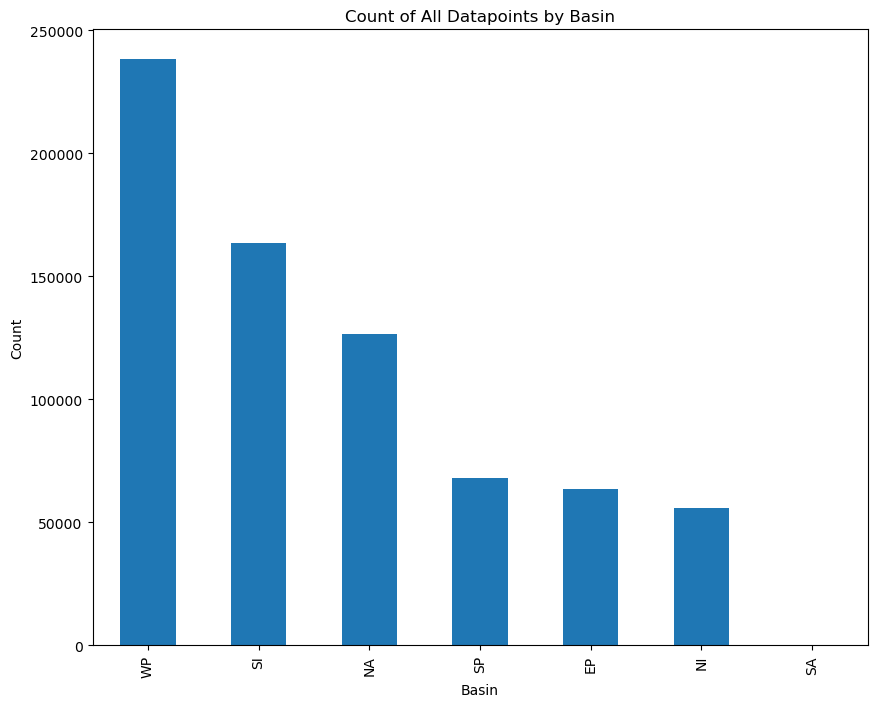

In [12]:
df['BASIN'].value_counts().plot(kind='bar', figsize=(10, 8))
plt.xlabel('Basin')
plt.ylabel('Count')
plt.title('Count of All Datapoints by Basin')
plt.show()


### 7) Plot the count of unique hurricanes by Basin

as a bar chart.

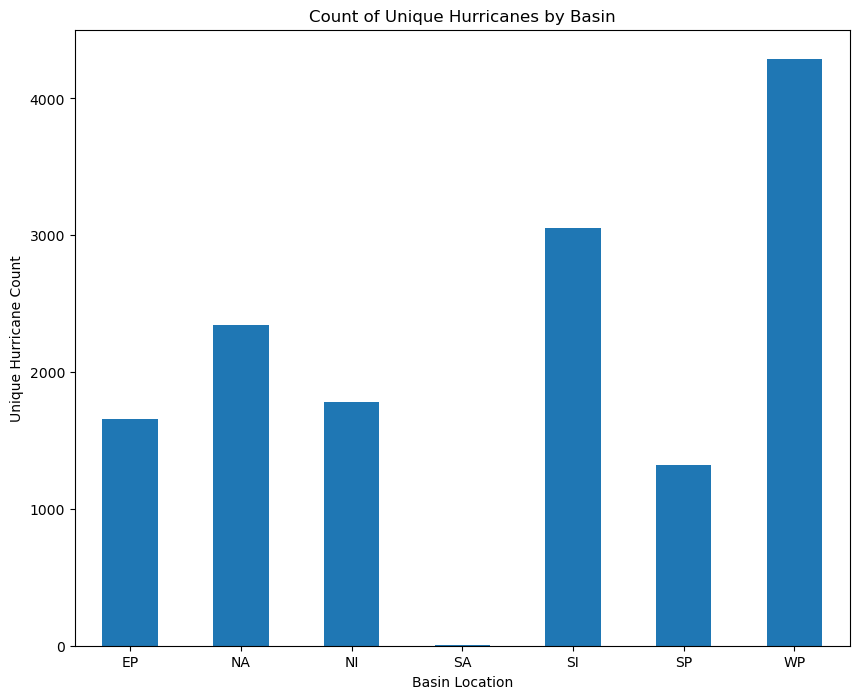

In [13]:
unique_hurricanes_by_basin = df.groupby('BASIN')['SID'].nunique().plot(kind='bar', figsize=(10, 8))
plt.xlabel('Basin Location')  
plt.ylabel('Unique Hurricane Count')  
plt.title('Count of Unique Hurricanes by Basin')  
plt.xticks(rotation=0)  
plt.show()

### 8) Make a `hexbin` of the location of datapoints in Latitude and Longitude

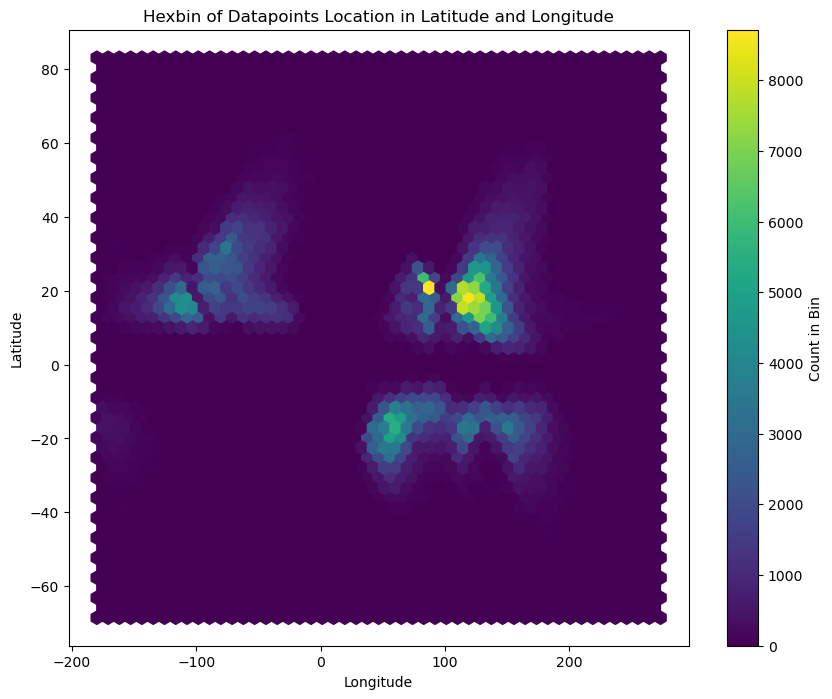

In [14]:
plt.figure(figsize=(10, 8))
plt.hexbin(df['LON'], df['LAT'], gridsize=50, cmap='viridis')
plt.colorbar(label='Count in Bin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin of Datapoints Location in Latitude and Longitude')
plt.show()


### 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

First find the SID of this hurricane.

In [15]:
katrina_sid = df[(df['NAME'] == 'KATRINA') & (df['ISO_TIME'].dt.year == 2005)]['SID'].unique()[0]
katrina_track = df[df['SID'] == katrina_sid]
print(katrina_sid)


2005236N23285


Next get this hurricane's group and plot its position as a scatter plot. Use wind speed to color the points.

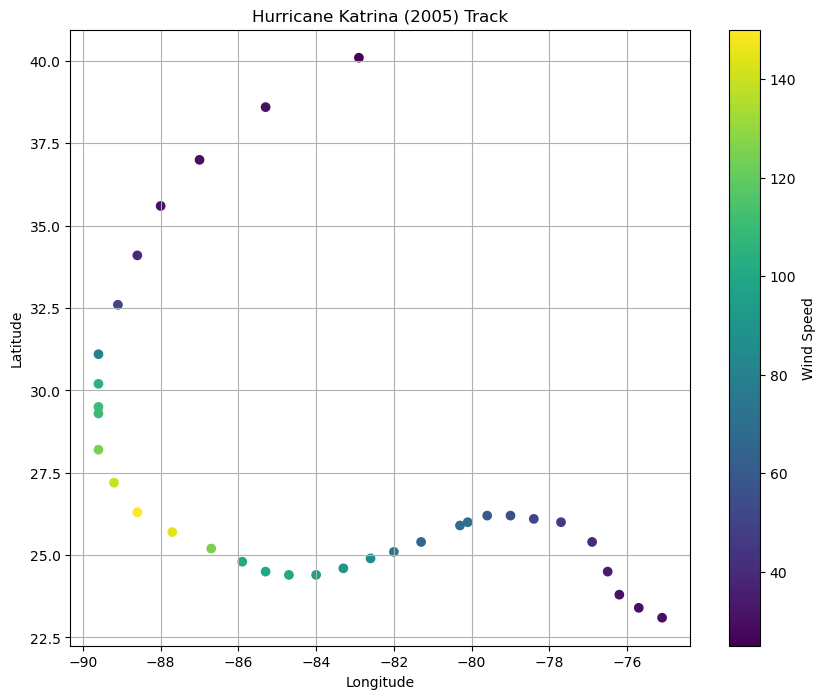

In [16]:
katrina_sid = df[(df['NAME'] == 'KATRINA') & (df['ISO_TIME'].dt.year == 2005)]['SID'].unique()[0]
katrina_track = df[df['SID'] == katrina_sid]

plt.figure(figsize=(10, 8))
sc = plt.scatter(katrina_track['LON'], katrina_track['LAT'], c=katrina_track['WIND'], cmap='viridis')
cbar = plt.colorbar(sc)
cbar.set_label('Wind Speed')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hurricane Katrina (2005) Track')
plt.grid()
plt.show()


### 10) Make time the index on your dataframe

In [17]:
df.set_index('ISO_TIME', inplace=True)


### 11) Plot the count of all datapoints per year as a timeseries

You should use `resample`

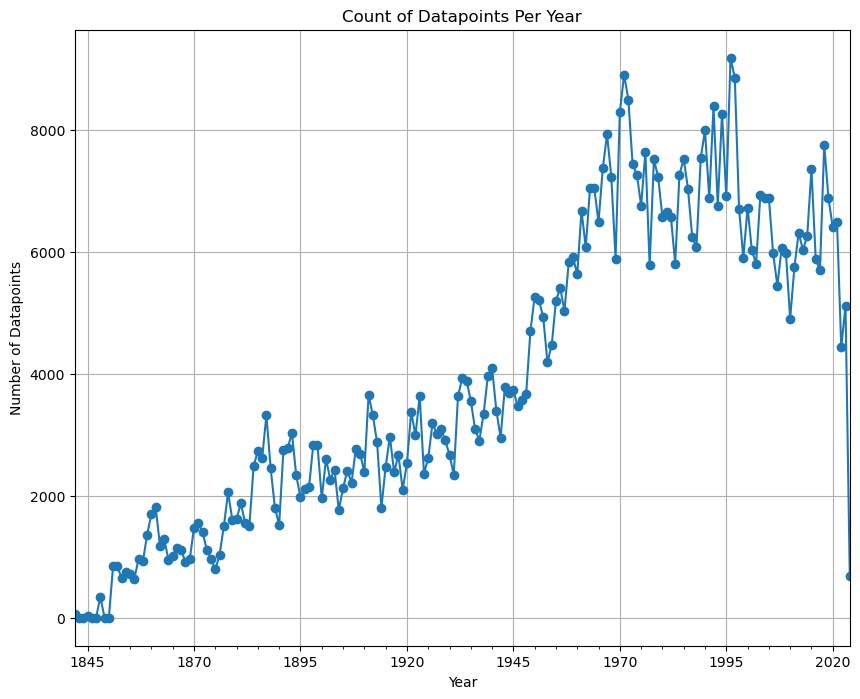

In [18]:
yearly_counts = df.resample('YE').size()

plt.figure(figsize=(10, 8))
yearly_counts.plot(kind='line', marker='o')
plt.title('Count of Datapoints Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Datapoints')
plt.grid(True)
plt.show()
